[正态分布] https://blog.csdn.net/lanhezhong/article/details/105677178


已知全班50人，孩子各门考试成绩及总分，全班各科平均分及平均总分，推算孩子班中排名

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# 中文乱码--mac系统
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

total_stu = 50   #全班总学生数
student = [605,95,106,98,75,70,86,75]          #学生各科分数，第一个为总分
ave = [563,88.5,95,94.2,66.1,66.5,75.6,77.1]   #全班各科平均分，第一个为总分平均分

## 概率密度函数

- stats.norm.pdf

Text(0.5, 0, 'x')

Text(0, 0.5, 'p')

Text(0.5, 1.0, '正态分布概率密度cdf')

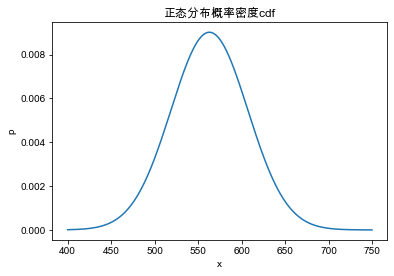

In [15]:
X = []
Y = []

sig = np.linspace(30,120,num = 20)

for a in np.linspace(400, 750, num=1000):
    y = stats.norm.pdf(a,ave[0],sig[3])
    X.append(a)
    Y.append(y)
plt.plot(X, Y)
plt.xlabel("x")
plt.ylabel("p")
plt.title("正态分布概率密度cdf")
plt.show()

Text(0.5, 0, 'x')

Text(0, 0.5, 'p')

Text(0.5, 1.0, '正态分布概率密度pdf')

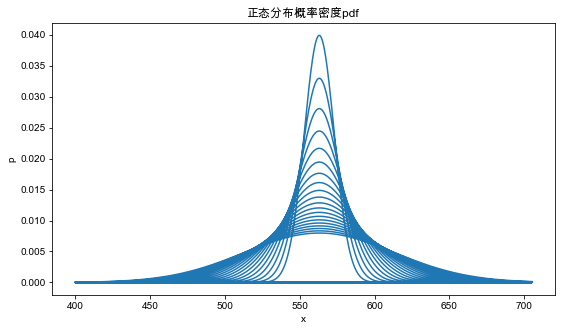

In [16]:
X = []
Y = []

fig = plt.figure(figsize=(9,5))
sig_range = np.linspace(10,50,num = 20)
score_range = [400,705]

for sig in range(0,len(sig_range)):
    for a in np.linspace(score_range[0], score_range[1], num=1000):
        y = stats.norm.pdf(a,ave[0],sig_range[sig])
        X.append(a)
        Y.append(y)
plt.plot(X, Y)
plt.xlabel("x")
plt.ylabel("p")
plt.title("正态分布概率密度pdf")

    
plt.show()

## 累积概率密度（概率分布）

- stats.norm.cdf

Text(0.5, 0, 'x')

Text(0, 0.5, 'p')

Text(0.5, 1.0, '正态分布累积概率分布cdf')

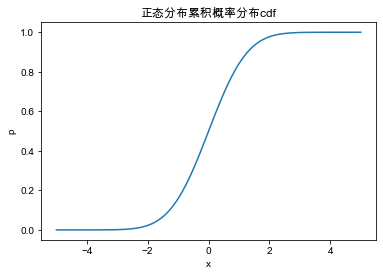

In [17]:
X = []
Y = []
for a in np.linspace(-5, 5, 100):
    y = stats.norm.cdf(a)
    X.append(a)
    Y.append(y)
plt.plot(X, Y)
plt.xlabel("x")
plt.ylabel("p")
plt.title("正态分布累积概率分布cdf")


Text(0.5, 0, 'x')

Text(0, 0.5, 'p')

Text(0.5, 1.0, '正态分布概率密度pdf')

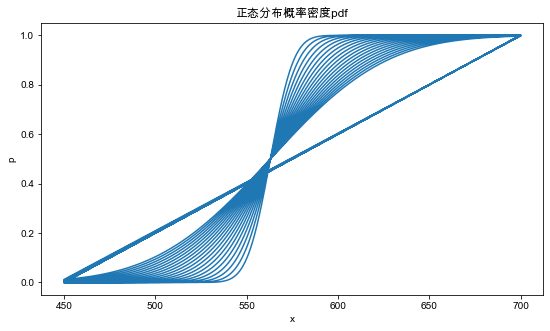

In [19]:
X = []
Y = []

fig = plt.figure(figsize=(9,5))
sig_range = np.linspace(10,50,num = 20)
score_range = [450,700]

for sig in range(0,len(sig_range)):
    for a in np.linspace(score_range[0], score_range[1], num=1000):
        y = stats.norm.cdf(a,ave[0],sig_range[sig])
        X.append(a)
        Y.append(y)
plt.plot(X, Y)
plt.xlabel("x")
plt.ylabel("p")
plt.title("正态分布概率密度pdf")

    
plt.show()

## 查表

- 正态分布查表其实就是查累积概率分布。

- 设某校学生身高服从均值为160， 方差为3600的正态分布，那该校学生身高在180以下的学生比例是多少？

    - 转换为标准正态分布，\frac{X-160}{60 }服从标准正态分布，\frac{180-160}{60 }=0.5，于是我们查标准正态分布表0.5的值，用scipy.stats.norm.cdf(0.5)
    
    
    
- 孩子总分为605，全班平均总分 563
- 方差根为 sig in sig_range

- lessPortionLookup = (605-563)/sig

In [2]:
def rankCdf(total_stu = 50,
            student= [605,95,106,98,75,70,86,75],
            ave= [563,88.5,95,94.2,66.1,66.5,75.6,77.1] ,
            course = 0,
            sig_range= np.linspace(30,150,num = 20),
            score_range= [450,700]):
    
    # 做pdf图
    X = []
    Y = []

    #做cdf图
    A = []  
    B = []

    fig = plt.figure(figsize=(15,5))
#     sig_range = np.linspace(30,150,num = 20)
#     score_range = [450,700]

    rank = []

    for sig in sig_range:
        lessPortionLookup = (student[course]-ave[course])/sig
        lessPortion = stats.norm.cdf(lessPortionLookup)
        rank_esti = math.floor(total_stu * (1-lessPortion))
        rank.append(rank_esti)
    #     print('Portion of students after the kid:',lessPortion)
        print('Estimated student rank is:',rank_esti,' under sigma as:',sig)


        for a in np.linspace(score_range[0], score_range[1], num=1000):
            y = stats.norm.cdf(a,ave[course],sig)
            b = stats.norm.pdf(a,ave[course],sig)

            X.append(a)
            Y.append(y)

            A.append(a)
            B.append(b)

    plt.subplot(121)

    plt.plot(A, B)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('正态分布累积分布cdf')


    plt.subplot(122)
    plt.plot(X, Y)
    plt.xlabel("x")
    plt.ylabel("p")
    plt.title("正态分布概率密度pdf")


    plt.show()
    
    return rank

In [3]:
########### 依照频次高低排列做图
def rankFreq(rank):

    rank_df = pd.DataFrame(rank)
    # rank_df

    rank_df.value_counts().plot.bar()
    plt.title('Rank Frequency with Different Sigma')
    
    return rank_df

## 主程序入口


Estimated student rank is: 8  under sigma as: 50.0
Estimated student rank is: 9  under sigma as: 52.04081632653061
Estimated student rank is: 9  under sigma as: 54.08163265306123
Estimated student rank is: 9  under sigma as: 56.12244897959184
Estimated student rank is: 10  under sigma as: 58.16326530612245
Estimated student rank is: 10  under sigma as: 60.20408163265306
Estimated student rank is: 10  under sigma as: 62.244897959183675
Estimated student rank is: 11  under sigma as: 64.28571428571429
Estimated student rank is: 11  under sigma as: 66.3265306122449
Estimated student rank is: 11  under sigma as: 68.36734693877551
Estimated student rank is: 12  under sigma as: 70.40816326530611
Estimated student rank is: 12  under sigma as: 72.44897959183673
Estimated student rank is: 12  under sigma as: 74.48979591836735
Estimated student rank is: 12  under sigma as: 76.53061224489795
Estimated student rank is: 13  under sigma as: 78.57142857142857
Estimated student rank is: 13  under sigma

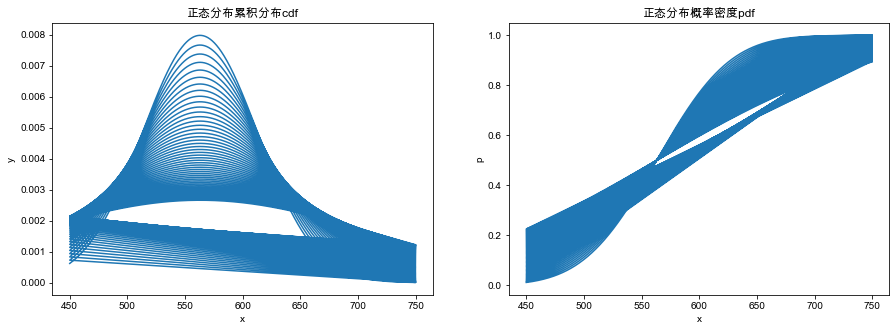

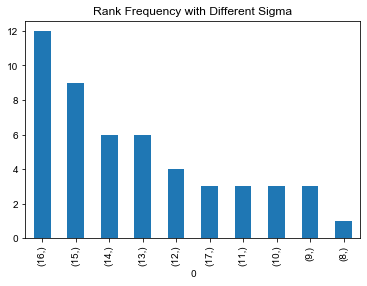

In [19]:
# 中文乱码--mac系统
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 参数设置
total_stu = 44
student= [605,95,106,98,75,70,86,75]
ave= [563,88.5,95,94.2,66.1,66.5,75.6,77.1] 

topPoints = [677,104,117,116,79,81,98,95]  #各科最高分（第一项为总分）
fullPoints = [740,120,120,120,90,90,100,100]  #各科满分（第一项为7科总满分）

## 总分
course = 0     # 总分
sig_range= np.linspace(50,150,num = 50)   # course=0
score_range= [450,750]   #总满分740的，下标为0,course=0


# ## 满分为120的科目
# course = 3     # 120满分，第1，2，3科
# sig_range= np.linspace(4,40,num = 70)   # course=0
# score_range= [70,120]   #满分120的，course = 1，2，3

## 满分为90的科目
# course = 5     # 90满分，第4，5科
# sig_range= np.linspace(3,40,num = 50)   # course=0
# score_range= [50,100]   

## 满分为100的科目
# course = 6     # 100满分，第6,7科
# sig_range= np.linspace(3,40,num = 50)   # course=0
# score_range= [50,100]   


rank = rankCdf(total_stu,student,ave,course,sig_range,score_range)

b = rankFreq(rank)

In [ ]:
# 中文乱码--mac系统
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


# 参数设置
total_stu = 50   #全班总学生数
student = [605,95,106,98,75,70,86,75]          #学生各科分数，第一个为总分
ave = [563,88.5,95,94.2,66.1,66.5,75.6,77.1]   #全班各科平均分，第一个为总分平均分

# 做pdf图
X = []

Y = []

#做cdf图
A = []  
B = []

fig = plt.figure(figsize=(15,5))
sig_range = np.linspace(30,150,num = 20)
score_range = [450,700]

rank = []

for sig in sig_range:
    lessPortionLookup = (student[0]-ave[0])/sig
    lessPortion = stats.norm.cdf(lessPortionLookup)
    rank_esti = math.floor(total_stu * (1-lessPortion))
    rank.append(rank_esti)
#     print('Portion of students after the kid:',lessPortion)
    print('Estimated student rank is:',rank_esti,' under sigma as:',sig)
    
    
    for a in np.linspace(score_range[0], score_range[1], num=1000):
        y = stats.norm.cdf(a,ave[0],sig)
        b = stats.norm.pdf(a,ave[0],sig)
        
        X.append(a)
        Y.append(y)
        
        A.append(a)
        B.append(b)
    
plt.subplot(121)

plt.plot(A, B)
plt.xlabel("x")
plt.ylabel("y")
plt.title('正态分布累积分布cdf')


plt.subplot(122)
plt.plot(X, Y)
plt.xlabel("x")
plt.ylabel("p")
plt.title("正态分布概率密度pdf")

    
plt.show()

<AxesSubplot:xlabel='0'>

Text(0.5, 1.0, 'Rank Frequency with Different Sigma')

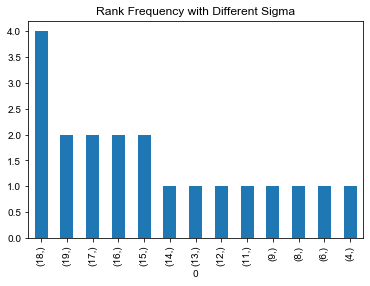

In [11]:
########### 依照频次高低排列做图
rank_df = pd.DataFrame(rank)
# rank_df

rank_df.value_counts().plot.bar()
plt.title('Rank Frequency with Different Sigma')

## 各门课程与班级平均分之间的排名
- 将排名变为function
- 输入不同单人分数及平均分
- 输出cdf、pdf及rank frequency

### function

- 传参
- 功能
